In [508]:
%matplotlib
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.interpolate import griddata

import numpy as np

Using matplotlib backend: QtAgg


In [509]:
def parseResult(filename):
    x1, x2 = [], []
    with open(filename) as f:
        lines = f.readlines()
    lines = lines[2:len(lines):5]
    
    for line in lines:
        x1.append(line.split()[0])
        x2.append(line.split()[1])

    return np.array(x1).astype(float), np.array(x2).astype(float)

def IntersectingCirclesAtPoint(ax, minX, maxX, minY, maxY, X, Y):
    Z = (pow(X + 2, 2) + pow(Y - 2, 2) - 4)**2 + (pow(X - 2, 2) + pow(Y - 2, 2) - 4)**2
    
    cf = ax.contourf(X, Y, Z, levels=np.linspace(0, 50, 20), cmap='pink', alpha=0.8)
    ax.contour(X, Y, Z, levels=np.linspace(0, 500, 20), cmap='pink', alpha=0.15)
    drawCircle(-2, 2, 2, ax), drawCircle(2, 2, 2, ax)
    plt.colorbar(cf, shrink=0.65)
    
def IntersectingCircles(ax, minX, maxX, minY, maxY, X, Y):
    Z = (pow(X + 1, 2) + pow(Y - 2, 2) - 4)**2 + (pow(X - 1, 2) + pow(Y - 2, 2) - 4)**2
    
    cf = ax.contourf(X, Y, Z, levels=np.linspace(0, 50, 30), cmap='pink', alpha=0.8)
    ax.contour(X, Y, Z, levels=np.linspace(0, 500, 20), cmap='pink', alpha=0.15)
    drawCircle(-1, 2, 2, ax), drawCircle(1, 2, 2, ax)
    plt.colorbar(cf, shrink=0.65)
        
def IntersectionOfCirclesWithLine(ax, minX, maxX, minY, maxY, X, Y):
    Z = (pow(X + 1, 2) + pow(Y - 2, 2) - 4)**2 + (pow(X - 1, 2) + pow(Y - 2, 2) - 4)**2 + (X + Y - 2)**2
    
    cf = ax.contourf(X, Y, Z, levels=np.linspace(0, 80, 60), cmap='pink', alpha=0.8)
    ax.contour(X, Y, Z, levels=np.linspace(0, 500, 10), cmap='pink', alpha=0.15)
    drawCircle(-1, 2, 2, ax), drawCircle(1, 2, 2, ax), drawLine(0, 2, 2, 0)
    plt.colorbar(cf, shrink=0.65)
    
def IntersectingLines(ax, minX, maxX, minY, maxY, X, Y):
    Z = (X + Y - 4)**2 + X**2 + Y**2
    
    cf = ax.contourf(X, Y, Z, levels=np.linspace(0, 30, 50), cmap='pink', alpha=0.8)
    ax.contour(X, Y, Z, levels=np.linspace(0, 500, 20), cmap='pink', alpha=0.15)
    drawLine(0, 4, 4, 0), drawLine(1, 0, -1, 0), drawLine(0, 1, 0, -1)
    plt.colorbar(cf, shrink=0.65)
    
def IntersectingLinesWithWeight(ax, minX, maxX, minY, maxY, X, Y):
    Z = (-2*(X + Y - 4))**2 + X**2 + (Y - 4)**2
    
    cf = ax.contourf(X, Y, Z, levels=np.linspace(0, 50, 20), cmap='pink', alpha=0.8)
    ax.contour(X, Y, Z, levels=np.linspace(0, 500, 20), cmap='pink', alpha=0.15)
    drawLine(0, 4, 4, 0), drawLine(1, 4, -1, 4), drawLine(0, 1, 0, -1)
    plt.colorbar(cf, shrink=0.65)
    
def IntersectingLinesWithSineWave(ax, minX, maxX, minY, maxY, X, Y):
    Z = (np.sin(X) - Y)**2 + (X - Y + 1)**2
    
    cf = ax.contourf(X, Y, Z, levels=np.linspace(0, 40, 70), cmap='pink', alpha=0.8)
    ax.contour(X, Y, Z, levels=np.linspace(0, 500, 20), cmap='pink', alpha=0.15)
    drawSine(-3, 5), drawLine(0, 1, -1, 0)
    plt.colorbar(cf, shrink=0.65)

def drawCircle(x, y, radius, ax):
    ax.add_patch(plt.Circle((x, y), radius, alpha=0.7, color='k', fill=False, lw=1.6))
    
def drawLine(x1, y1, x2, y2):
    plt.axline((x1, y1), (x2, y2), alpha=0.7, color='k', lw=1.6)
    
def drawSine(a, b):
    x = np.linspace(a, b, 100)
    plt.plot(x, np.sin(x), alpha=0.7, color='k', lw=1.6)
    
def makePlot(x, y, plotType, minX, maxX, minY, maxY, startPoint):
    fig, ax = plt.subplots(figsize=(20, 10))   
    X, Y = np.meshgrid(np.arange(minX*2, maxX*2, 0.1), np.arange(minY*2, maxY*2, 0.1))
    xs, ys = startPoint
    
    if plotType == 'IntersectingCirclesAtPoint': IntersectingCirclesAtPoint(ax, minX, maxX, minY, maxY, X, Y)
    elif plotType == 'IntersectingCircles': IntersectingCircles(ax, minX, maxX, minY, maxY, X, Y)
    elif plotType == 'IntersectionOfCirclesWithLine': IntersectionOfCirclesWithLine(ax, minX, maxX, minY, maxY, X, Y)
    elif plotType == 'IntersectingLines': IntersectingLines(ax, minX, maxX, minY, maxY, X, Y)
    elif plotType == 'IntersectingLinesWithWeight': IntersectingLinesWithWeight(ax, minX, maxX, minY, maxY, X, Y)
    elif plotType == 'IntersectingLinesWithSineWave': IntersectingLinesWithSineWave(ax, minX, maxX, minY, maxY, X, Y)
    
    plt.axline((0, 0), (1, 0), alpha=0.3, color='k', lw=0.5, zorder=1)
    plt.axline((0, 0), (0, 1), alpha=0.3, color='k', lw=0.5, zorder=2) 
    plt.plot(x, y, 'r-', lw=4, zorder=3)
    plt.plot([xs, x[0]], [ys, y[0]], 'r-', lw=4, zorder=4)
    plt.scatter(x, y, s=100, c='grey', edgecolor='k', zorder=5)
    
    ax.scatter(xs, ys, s=120, c='k', edgecolor='grey', linewidth=3, zorder=6)
    ax.text(xs, ys, '  ('+', '.join([str(value) for value in startPoint])+')', size=20, va='center', fontweight='heavy', zorder=7)
    
    plt.xlim([minX, maxX])
    plt.ylim([minY, maxY])
    plt.xlabel('X', size=20)
    plt.ylabel('Y', size=20)
    
    ax.set_aspect(1)
    ax.grid(alpha=0.1)

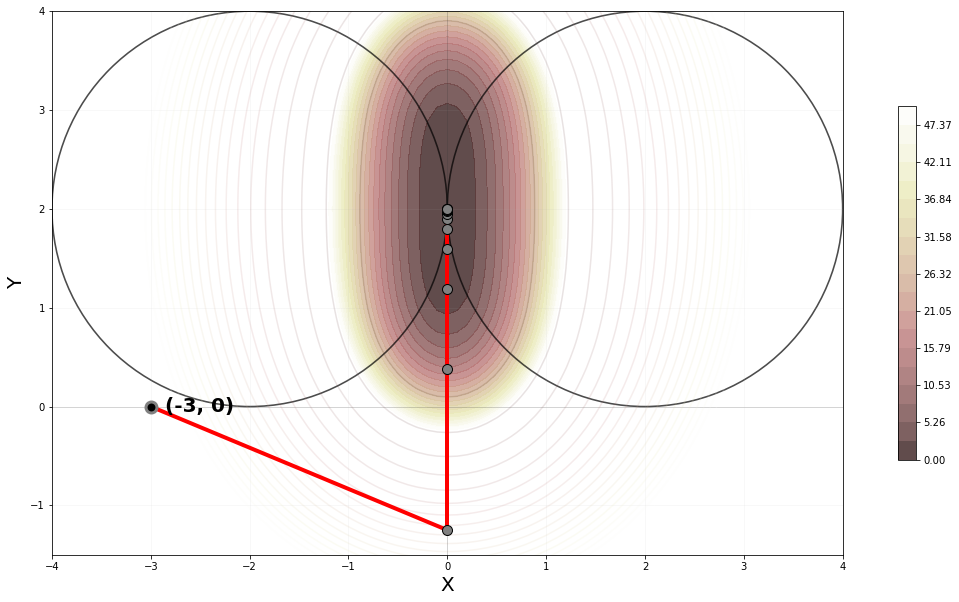

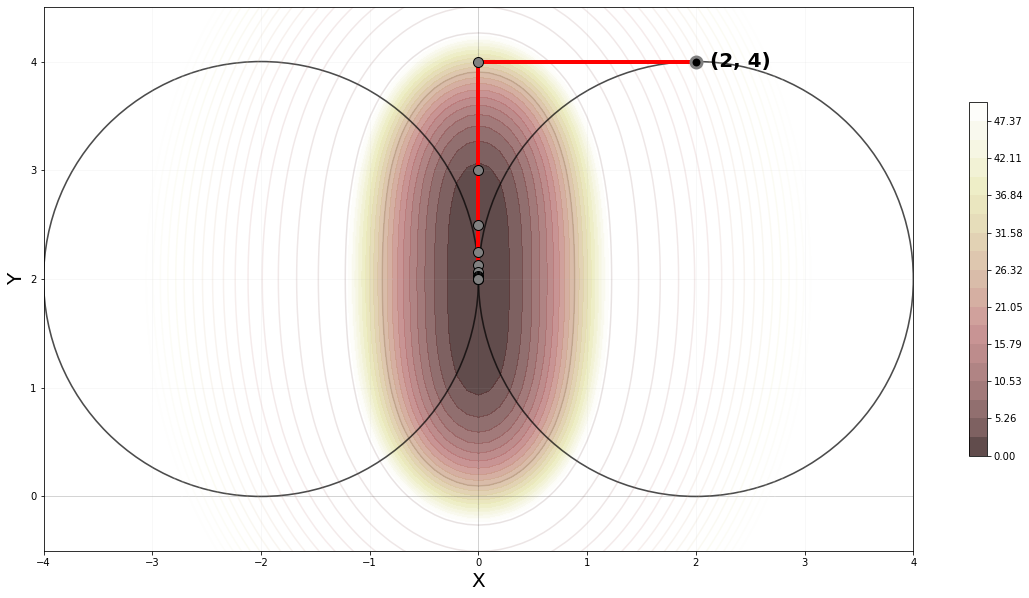

In [510]:
x1, x2 = parseResult('data/circles_at_point_-3_0.txt')
makePlot(x1, x2, 'IntersectingCirclesAtPoint', -4, 4, -1.5, 4, (-3, 0))

x1, x2 = parseResult('data/circles_at_point_2_4.txt')
makePlot(x1, x2, 'IntersectingCirclesAtPoint', -4, 4, -0.5, 4.5, (2, 4))

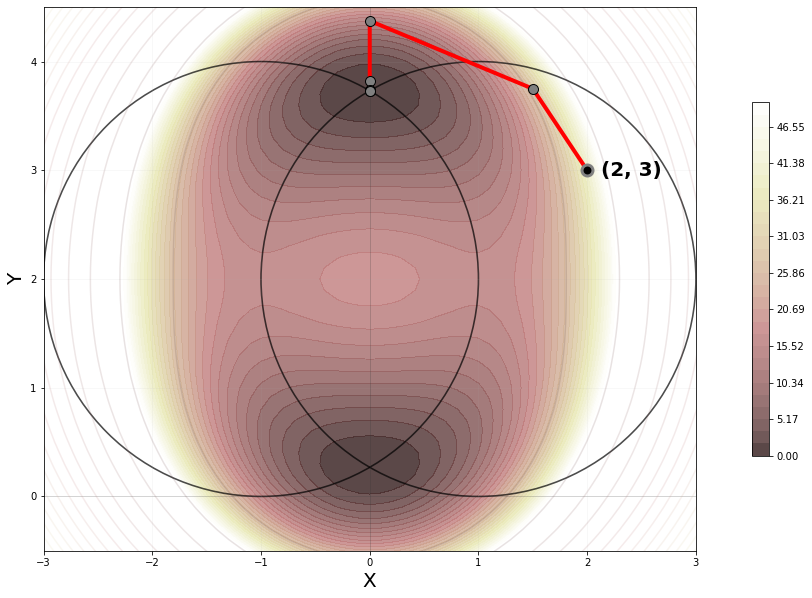

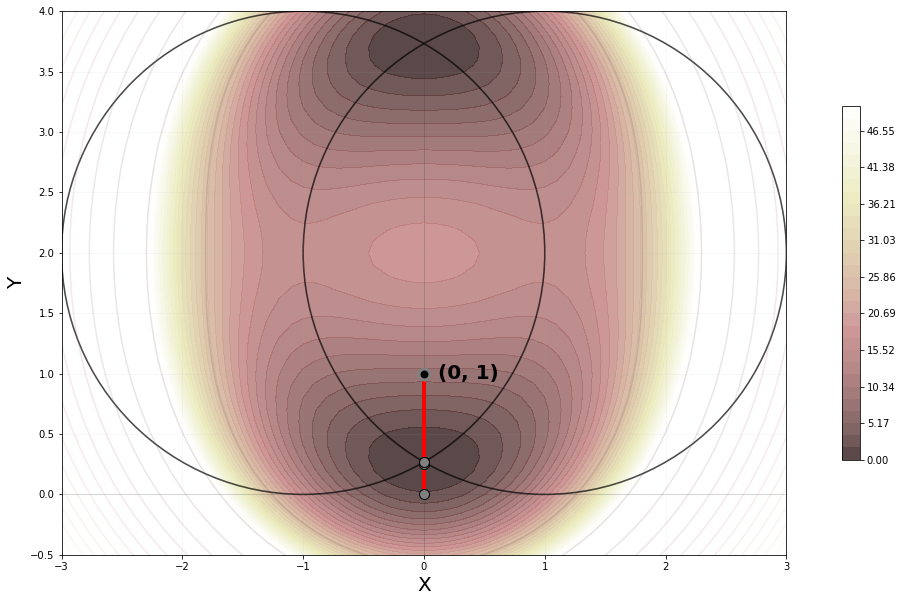

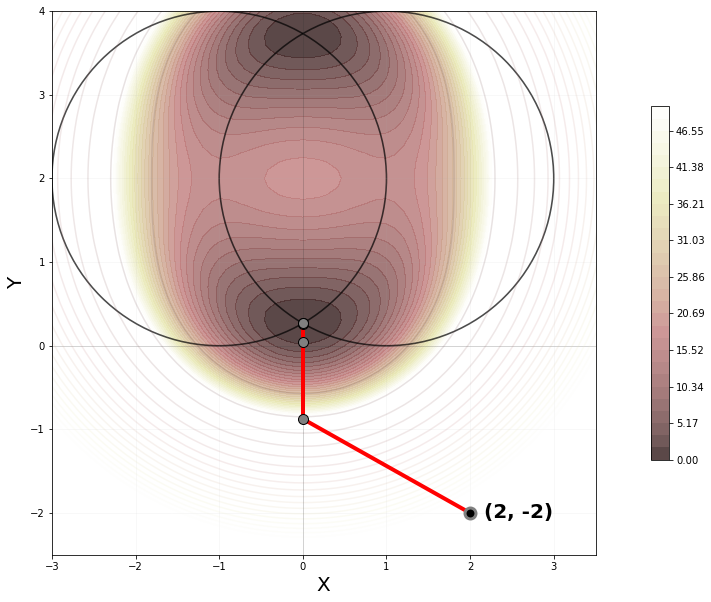

In [511]:
x1, x2 = parseResult('data/intersecting_circles_2_3.txt')
makePlot(x1, x2, 'IntersectingCircles', -3, 3, -0.5, 4.5, (2, 3))

x1, x2 = parseResult('data/intersecting_circles_0_1.txt')
makePlot(x1, x2, 'IntersectingCircles', -3, 3, -0.5, 4, (0, 1))

x1, x2 = parseResult('data/intersecting_circles_2_-2.txt')
makePlot(x1, x2, 'IntersectingCircles', -3, 3.5, -2.5, 4, (2, -2))

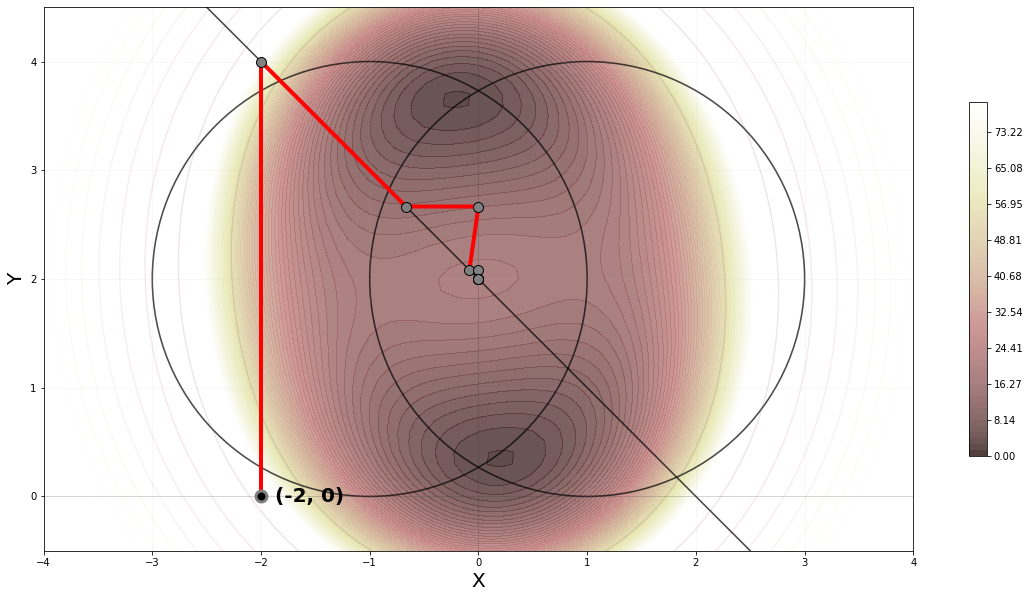

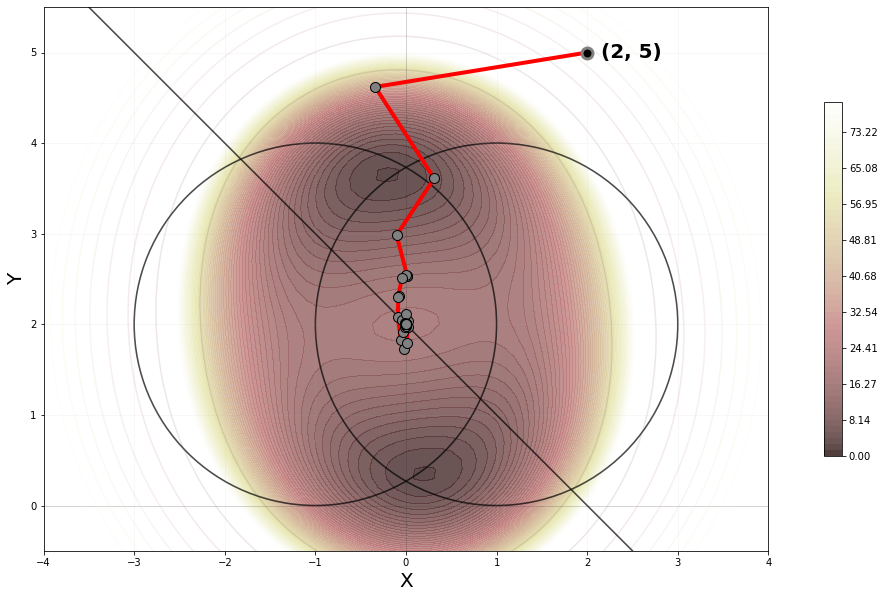

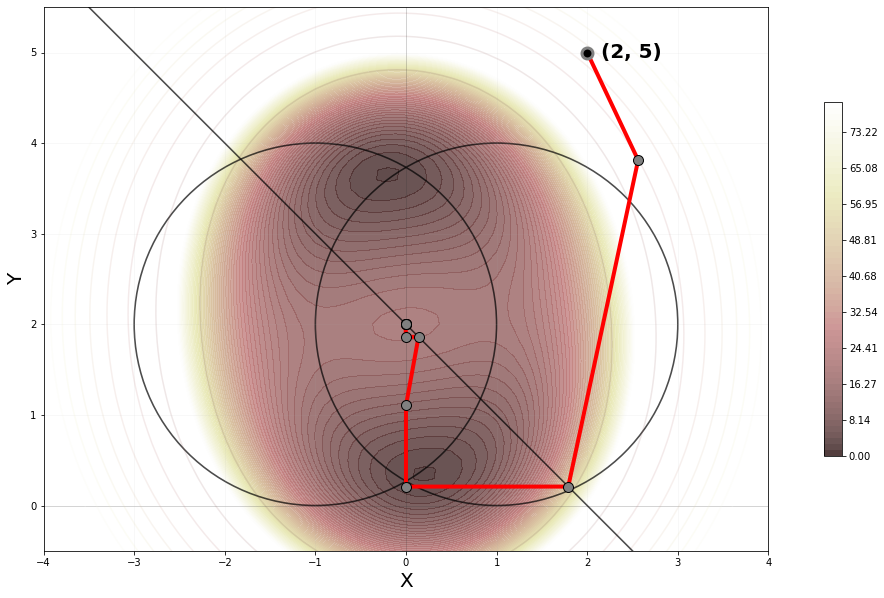

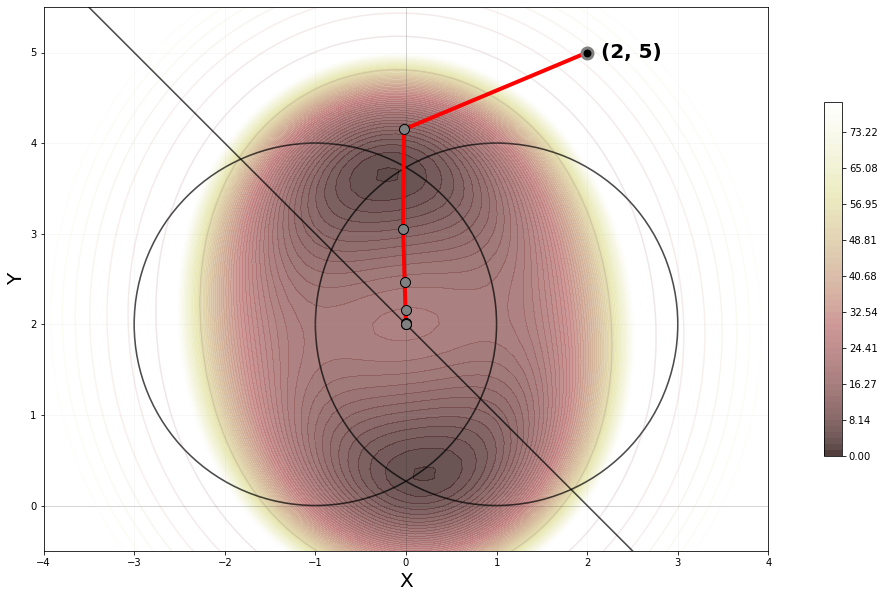

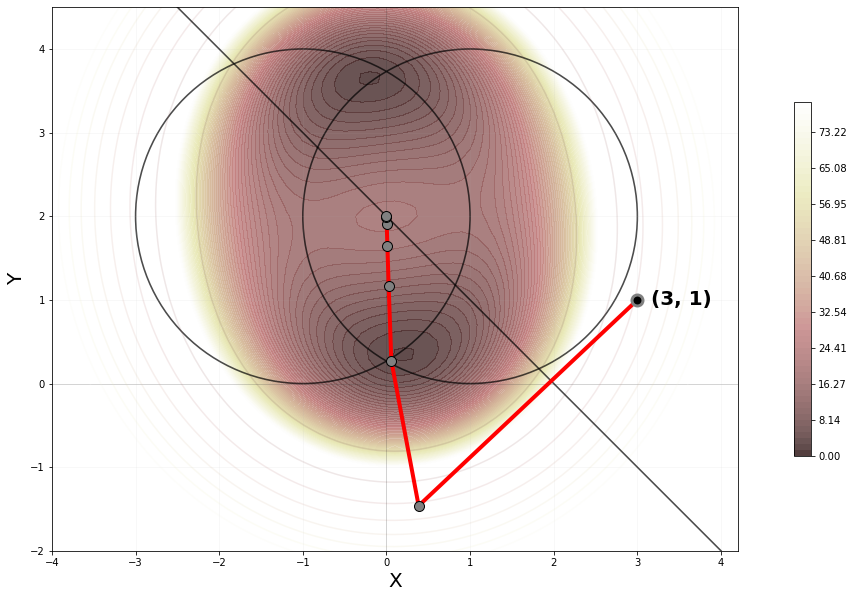

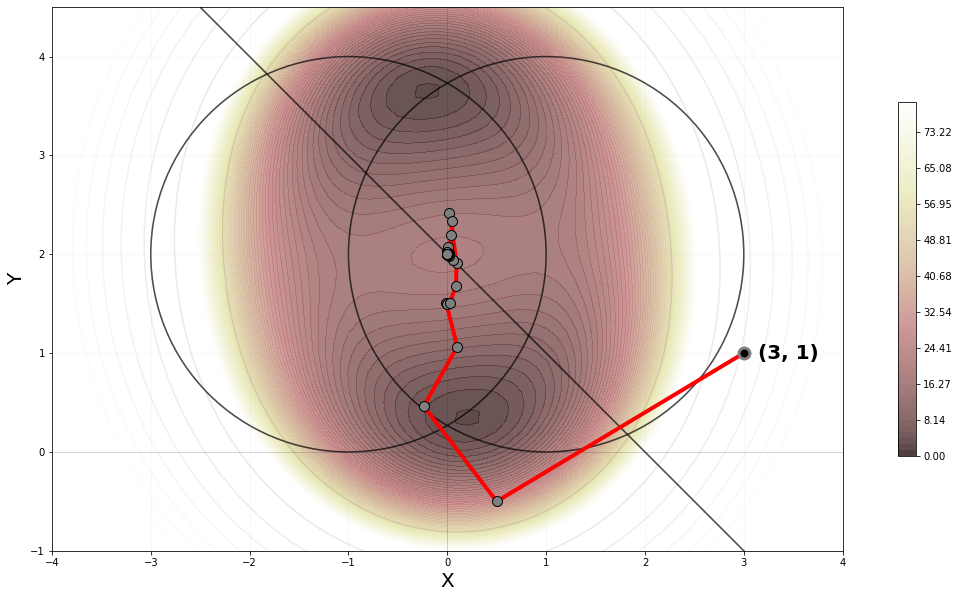

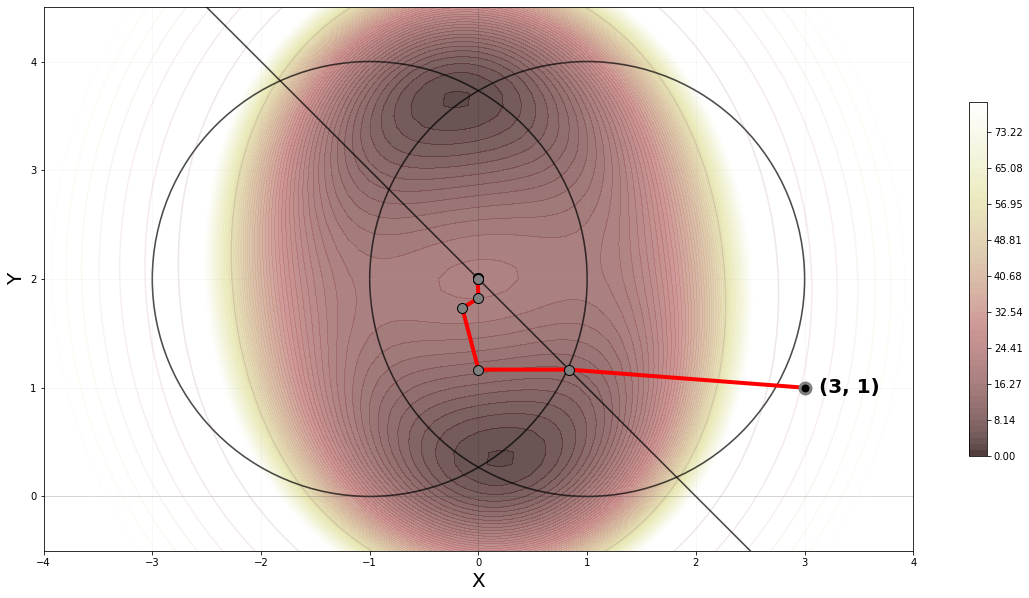

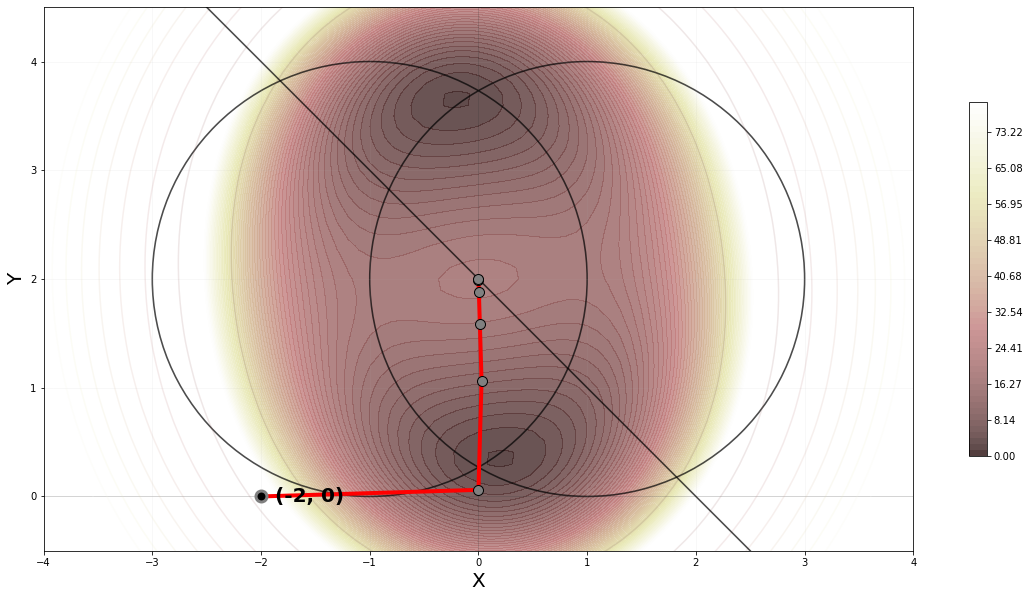

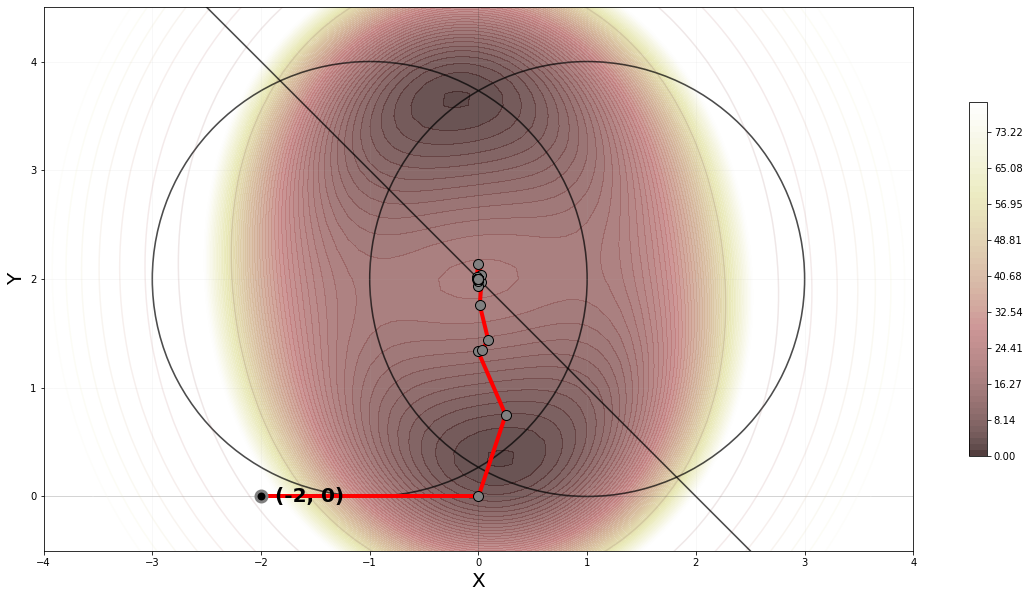

In [512]:
x1, x2 = parseResult('data/circles_with_line_-2_0_excluding_rows.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 4.5, (-2, 0))

x1, x2 = parseResult('data/circles_with_line_2_5_convolution.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 5.5, (2, 5))

x1, x2 = parseResult('data/circles_with_line_2_5_excluding_rows.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 5.5, (2, 5))

x1, x2 = parseResult('data/circles_with_line_2_5_symmetrization.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 5.5, (2, 5))

x1, x2 = parseResult('data/circles_with_line_3_1__symmetrization.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4.2, -2, 4.5, (3, 1))

x1, x2 = parseResult('data/circles_with_line_3_1_convolution.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -1, 4.5, (3, 1))

x1, x2 = parseResult('data/circles_with_line_3_1_excluding_rows.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 4.5, (3, 1))

x1, x2 = parseResult('data/circles_with_line_-2_0__symmetrization.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 4.5, (-2, 0))

x1, x2 = parseResult('data/circles_with_line_-2_0_convolution.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 4.5, (-2, 0))

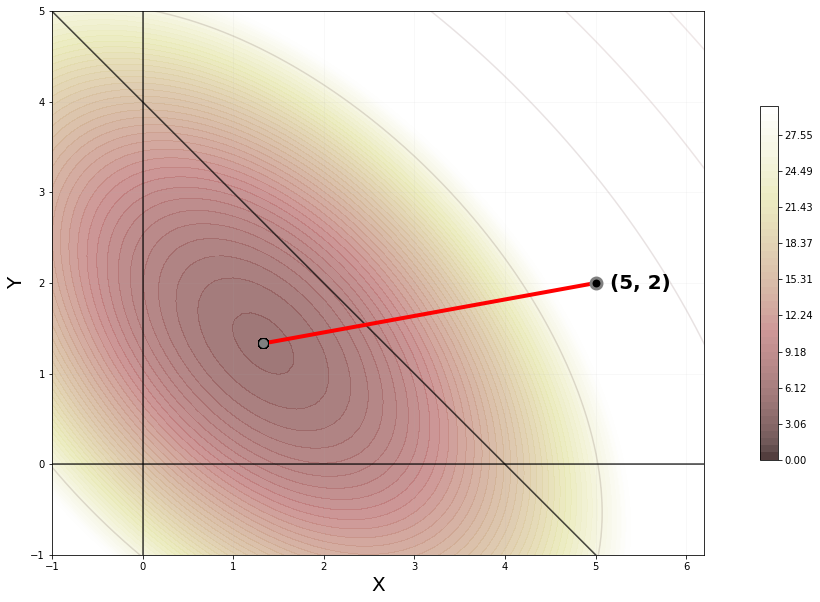

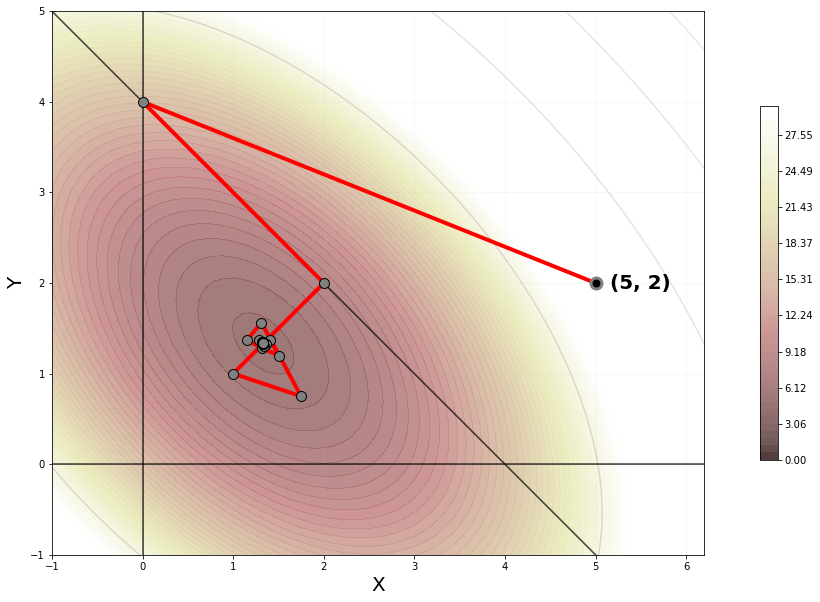

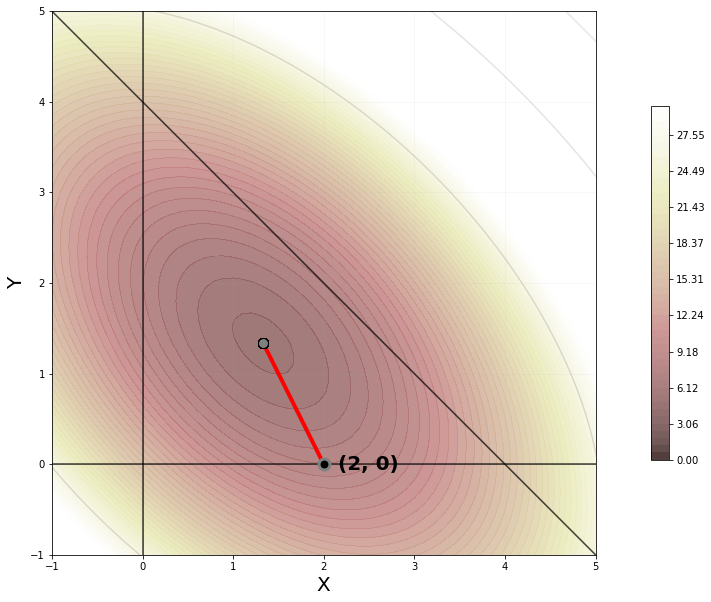

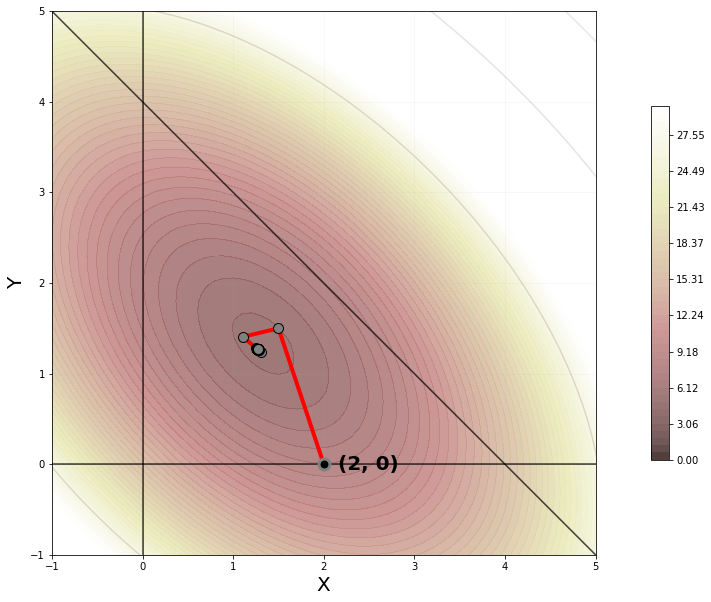

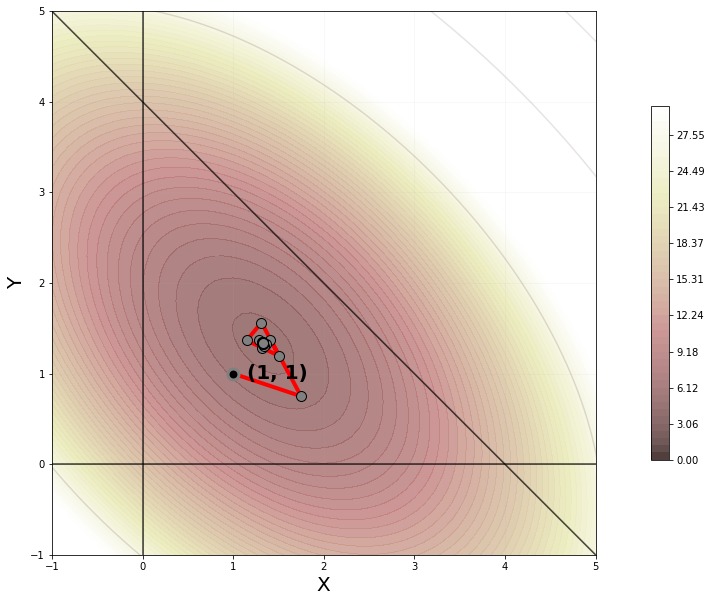

In [513]:
x1, x2 = parseResult('data/lines_5_2_symmetrization.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 6.2, -1, 5, (5, 2))

x1, x2 = parseResult('data/lines_5_2_excluding_rows.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 6.2, -1, 5, (5, 2))

x1, x2 = parseResult('data/lines_2_0_symmetrization.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 5, -1, 5, (2, 0))

x1, x2 = parseResult('data/lines_2_0_convolution.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 5, -1, 5, (2, 0))

x1, x2 = parseResult('data/lines_1_1_excluding_rows.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 5, -1, 5, (1, 1))

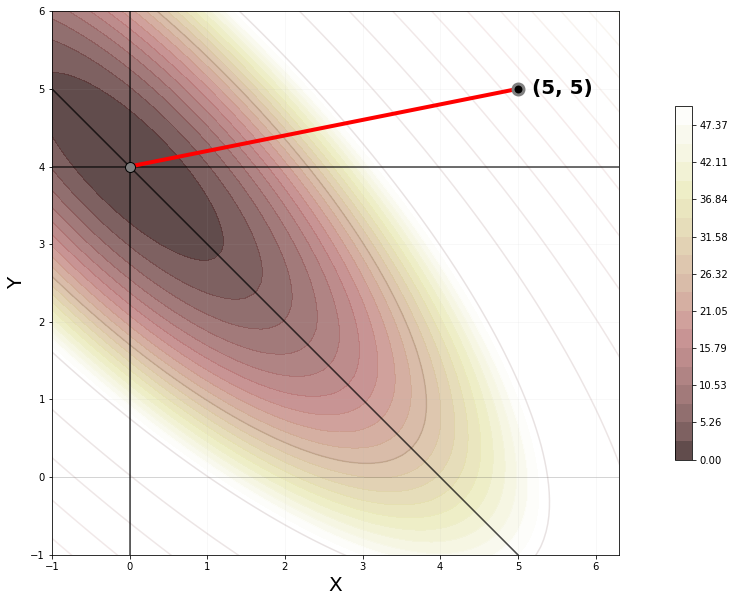

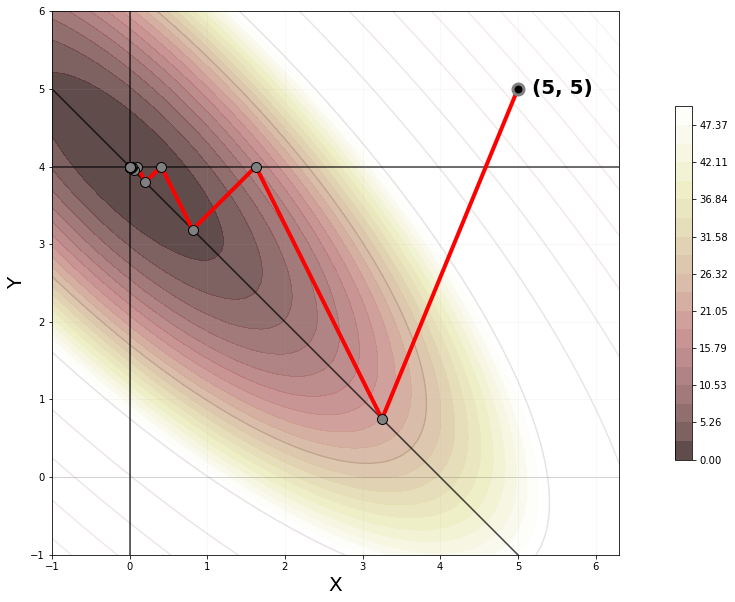

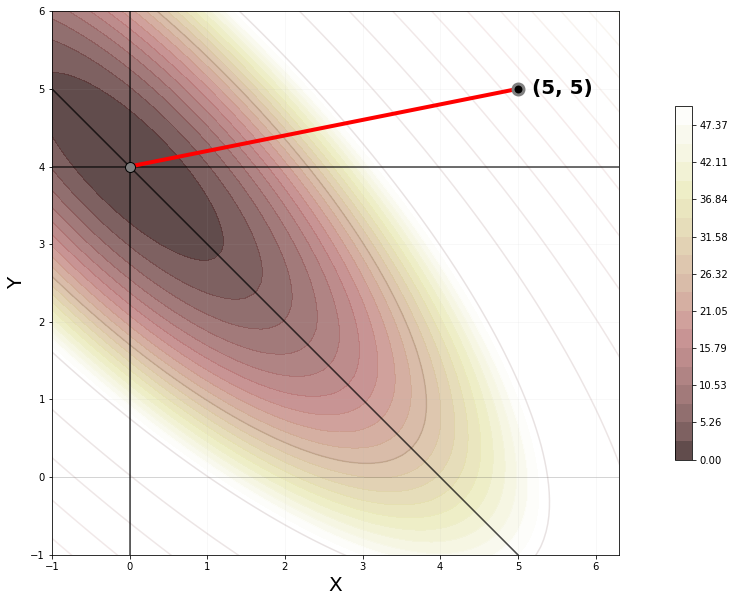

In [514]:
x1, x2 = parseResult('data/lines_with_weight_5_5_symmetrization.txt')
makePlot(x1, x2, 'IntersectingLinesWithWeight', -1, 6.3, -1, 6, (5, 5))

x1, x2 = parseResult('data/lines_with_weight_5_5_convolution.txt')
makePlot(x1, x2, 'IntersectingLinesWithWeight', -1, 6.3, -1, 6, (5, 5))

x1, x2 = parseResult('data/lines_with_weight_5_5_excluding_rows.txt')
makePlot(x1, x2, 'IntersectingLinesWithWeight', -1, 6.3, -1, 6, (5, 5))

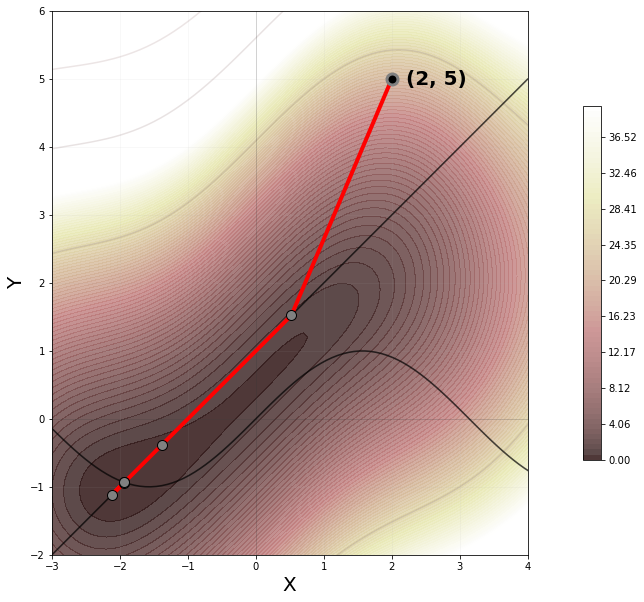

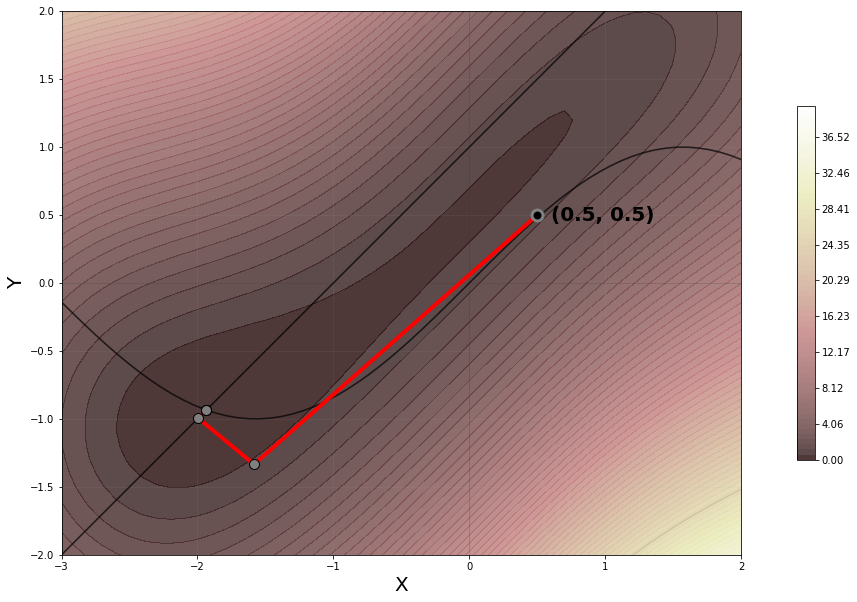

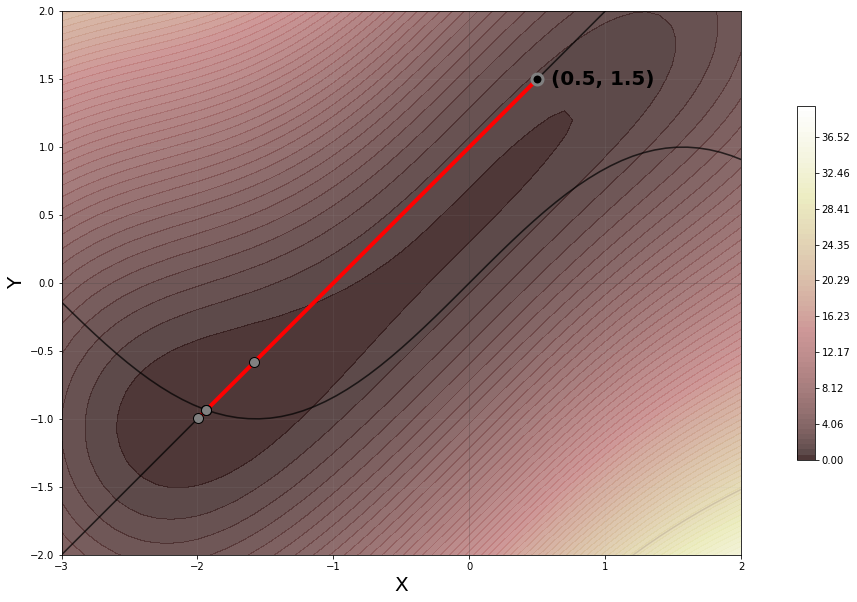

In [515]:
x1, x2 = parseResult('data/sin_wave_2_5.txt')
makePlot(x1, x2,'IntersectingLinesWithSineWave', -3, 4, -2, 6, (2, 5))

x1, x2 = parseResult('data/sin_wave_0_5_0_5.txt')
makePlot(x1, x2, 'IntersectingLinesWithSineWave', -3, 2, -2, 2, (0.5, 0.5))

x1, x2 = parseResult('data/sin_wave_0_5_1_5.txt')
makePlot(x1, x2, 'IntersectingLinesWithSineWave', -3, 2, -2, 2, (0.5, 1.5))